In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
FTtoTA = {}
for i in range(1,11):
    FTtoTA[i] = np.load(os.path.join("FTtoTA", "FTtoTA_"+str(i)+".npy"))

In [16]:
correct_FTtoTA = []
for ind in FTtoTA:
    print("Full text to title abstract ratio of "+str(ind)+":")
    print(np.sum(FTtoTA[ind]>0.5)/len(FTtoTA[ind]))
    # print averages
    print(np.mean(FTtoTA[ind]))
    correct_FTtoTA.append(np.sum(FTtoTA[ind]>0.5)/len(FTtoTA[ind]))

Full text to title abstract ratio of 1:
0.8775551782682512
0.6114901863715457
Full text to title abstract ratio of 2:
0.8913752122241086
0.6111649930764166
Full text to title abstract ratio of 3:
0.8936842105263157
0.6087622183722111
Full text to title abstract ratio of 4:
0.893446519524618
0.6072566799319149
Full text to title abstract ratio of 5:
0.8934125636672327
0.6063934386764317
Full text to title abstract ratio of 6:
0.8934804753820034
0.6058653605885704
Full text to title abstract ratio of 7:
0.8932427843803056
0.6055239180997013
Full text to title abstract ratio of 8:
0.8932427843803056
0.6052972911932061
Full text to title abstract ratio of 9:
0.8929711375212224
0.6051362339783537
Full text to title abstract ratio of 10:
0.8932088285229202
0.6050180433690433


In [12]:
TAtoFT = {}
correct_TAtoFT = []
for i in range(1,11):
    TAtoFT[i] = np.load(os.path.join("TAtoFT", "TAtoFT_"+str(i)+".npy"))
for ind in TAtoFT:
    print("Title abstract to fulltext ratio of "+str(ind)+":")
    print(np.sum(TAtoFT[ind]>0.5)/len(TAtoFT[ind]))
    correct_TAtoFT.append(np.sum(TAtoFT[ind]>0.5)/len(TAtoFT[ind]))

Title abstract to fulltext ratio of 1:
0.8775551782682512
Title abstract to fulltext ratio of 2:
0.8569439728353141
Title abstract to fulltext ratio of 3:
0.8485568760611205
Title abstract to fulltext ratio of 4:
0.8460101867572156
Title abstract to fulltext ratio of 5:
0.8443123938879457
Title abstract to fulltext ratio of 6:
0.8435653650254669
Title abstract to fulltext ratio of 7:
0.8428183361629881
Title abstract to fulltext ratio of 8:
0.8424108658743633
Title abstract to fulltext ratio of 9:
0.8421052631578947
Title abstract to fulltext ratio of 10:
0.8420033955857386


Text(0.5, 1.0, 'Fulltext vs Title Abstract Weighting Impact on Similarity')

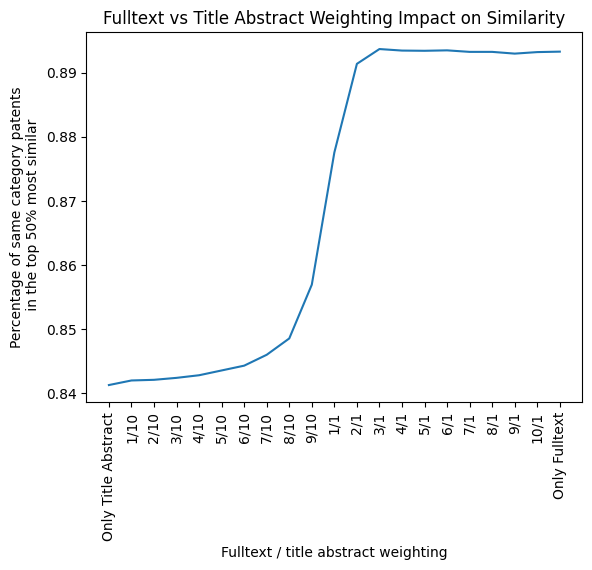

In [18]:
correct_total = [0.84129] + correct_TAtoFT[len(correct_TAtoFT)-1:0:-1] + correct_FTtoTA + [0.89328]
correct_total_x = ["Only Title Abstract","1/10", "2/10", "3/10", "4/10", "5/10", "6/10", "7/10", "8/10", "9/10", "1/1", "2/1", "3/1", "4/1", "5/1", "6/1", "7/1", "8/1", "9/1", "10/1", "Only Fulltext"]
plt.plot(correct_total_x, correct_total)
# Plot the x labels vertically
plt.xticks(rotation=90)
plt.xlabel("Fulltext / title abstract weighting")
#Make Y label larger
plt.ylabel("Percentage of same category patents\n in the top 50% most similar")

plt.title("Fulltext vs Title Abstract Weighting Impact on Similarity")

In [19]:
df = pd.read_csv("allpatents_with_abstracts_and_full_text.csv")

In [20]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("anferico/bert-for-patents")

vocab.txt:   0%|          | 0.00/329k [00:00<?, ?B/s]

In [35]:
average_len = []
for abstract in df["abstract_text"]:
    average_len.append(len(tokenizer(abstract)["input_ids"]))
print(np.mean(average_len))
print(np.min(average_len))
print(np.max(average_len))
    

137.41363082340195
7
607


In [36]:
title_len = []
for title in df["title"]:
    title_len.append(len(tokenizer(title)["input_ids"]))
print(np.mean(title_len))
print(np.max(title_len))
print(np.min(title_len))

11.413359967497291
101
3


In [37]:
fulltextlen = []
for text in df["description_text"]:
    fulltextlen.append(len(tokenizer(text)["input_ids"]))
print(np.mean(fulltextlen))
print(np.max(fulltextlen))
print(np.min(fulltextlen))

15341.895314192849
983606
599
